In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

p = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
d = pd.read_csv(p, sep = '\t')

In [105]:
# Show the first 10 entries
d.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

In [106]:
# What is the number of observations in the dataset?
d.values.shape[0]

4622

In [107]:
# What is the number of columns in the dataset?
d.values.shape[1]

5

In [108]:
# Which was the most-ordered item and how many times it was ordered?
a = d.loc[:,['quantity', 'item_name']].groupby(['item_name']).sum()
print(a.idxmax()[0], a.loc[a.idxmax()[0]][0])

Chicken Bowl 761


In [109]:
# How many different items are sold?
pd.unique(d['item_name']).shape[0]

50

In [110]:
# How many items were orderd in total?
np.sum(d['quantity'])

4972

In [128]:
#  Turn the item price into a float
d['item_price'] = d['item_price'].map(lambda x: float(x.replace('$', '')))
print(d['item_price'])

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64


In [112]:
# What is the price of each item?
print(d[d.quantity == 1].loc[:,['item_name', 'item_price']].drop_duplicates(keep="last").sort_values(by='item_name'))

                  item_name  item_price
4535      6 Pack Soft Drink        6.49
1383          Barbacoa Bowl       11.48
4056          Barbacoa Bowl        8.69
4135          Barbacoa Bowl        9.25
4510          Barbacoa Bowl       11.49
4594          Barbacoa Bowl       11.75
3253          Barbacoa Bowl        8.99
3902       Barbacoa Burrito        8.69
3809       Barbacoa Burrito        8.99
1648       Barbacoa Burrito       11.08
4603       Barbacoa Burrito        9.25
4592       Barbacoa Burrito       11.75
3276       Barbacoa Burrito       11.48
2787  Barbacoa Crispy Tacos       11.75
429   Barbacoa Crispy Tacos       11.48
3321  Barbacoa Crispy Tacos        8.99
1866  Barbacoa Crispy Tacos        9.25
4390    Barbacoa Salad Bowl        9.39
3546    Barbacoa Salad Bowl       11.89
3548    Barbacoa Soft Tacos       11.75
4271    Barbacoa Soft Tacos        9.25
3184    Barbacoa Soft Tacos       11.48
1642    Barbacoa Soft Tacos        8.99
4614          Bottled Water        1.50


In [113]:
# How much was the revenue for the period in the dataset?
d['item_price'].sum()

34500.16

In [114]:
# How many orders were made in the period?
d['order_id'].max()

1834

In [115]:
# What is the average revenue amount per order?
d.loc[:,['order_id', 'item_price']].groupby(['order_id']).sum().mean()

item_price    18.811429
dtype: float64

<Figure size 432x288 with 0 Axes>

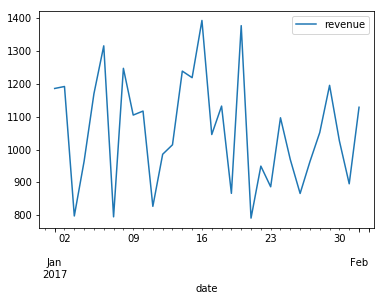

In [116]:
# Merge the table dfa that contains order date and order id with df and plot daily revenue
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
d1 = pd.merge(d, dfa, on='order_id')
c = d1.loc[:, ['item_price', 'date']].groupby('date').sum()
c = c.rename(columns={'item_price': 'revenue'})
plt.figure(); c.plot();


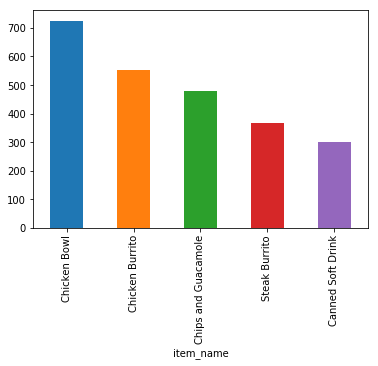

In [117]:
# Create a histogram of the top 5 items bought
h = d.groupby('item_name').size().sort_values(ascending=False)[0:5]
ax = h.plot.bar(); 
plt.show()

In [118]:
# Sort the dataset by the name of the item
print( d.sort_values(by='item_name'))

      order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
3422      1373         1  6 Pack Soft Drink   
553        230         1  6 Pack Soft Drink   
1916       774         1  6 Pack Soft Drink   
1922       776         1  6 Pack Soft Drink   
1937       784         1  6 Pack Soft Drink   
3836      1537         1  6 Pack Soft Drink   
298        129         1  6 Pack Soft Drink   
1976       798         1  6 Pack Soft Drink   
1167       481         1  6 Pack Soft Drink   
3875      1554         1  6 Pack Soft Drink   
1124       465         1  6 Pack Soft Drink   
3886      1558         1  6 Pack Soft Drink   
2108       849         1  6 Pack Soft Drink   
3010      1196         1  6 Pack Soft Drink   
4535      1803         1  6 Pack Soft Drink   
4169      166

In [119]:
# How many times were a Veggie Salad Bowl ordered?
d[d['item_name'] == 'Veggie Salad Bowl'].shape[0]

18

In [120]:
# How many times people orderd more than one Canned Soda?
(d1[d1["item_name"] == "Canned Soda"]["quantity"] > 1).sum()

20

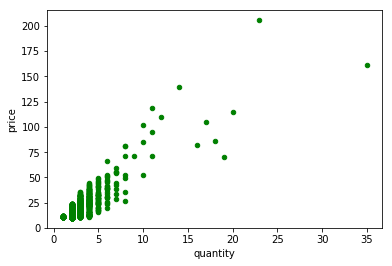

In [121]:
# Create a scatterplot with the number of items orderered per order price
pl = d.groupby('order_id').sum()
pl = pl.rename(columns={'item_price': 'price'})
e = pl.plot.scatter(x='quantity', y='price',  c='Green')